<a href="https://colab.research.google.com/github/jumbokh/csu1112-class/blob/main/notebooks/%E5%86%92%E9%9A%AA11_12_DNN_%E5%81%9A%E6%89%8B%E5%AF%AB%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

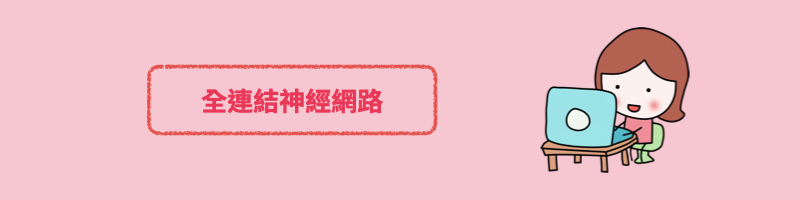

# 11.2讀入基本套件

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [3]:
from tensorflow.keras.datasets import mnist #一般手寫辨識資料

In [6]:
import tensorflow as tf
print(tf.__version__)
import tensorflow.keras as K
print(K.__version__)

2.9.2
2.9.0


# 11.4切分訓練資料和測試資料

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 11.5欣賞一下資料

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
n = 9487 #隨機看一筆資料的長相
x_train[n] #讀出第 n 筆資料

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

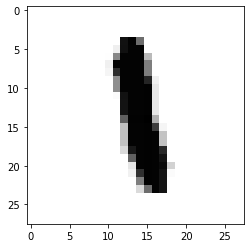

In [10]:
plt.imshow(x_train[n], cmap='Greys')

In [11]:
y_train[n] #第 n 筆資料的答案

1

# 11.6打造函數學習機前的資料處理

因為 `numpy` 「廣播」的特性, 我們對 `array` 中所有數字要同除以一個數可瞬間完成!

In [12]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [13]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [14]:
y_train.shape

(60000, 10)

In [15]:
y_train[n]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# 12.1第一部曲：打造神經網路

In [16]:
model = Sequential()

In [17]:
model.add(Dense(100, input_dim=784, activation='relu'))

In [18]:
model.add(Dense(100, activation='relu'))

In [19]:
model.add(Dense(100, activation='relu'))

In [20]:
model.add(Dense(10, activation='softmax'))

# 12.2組裝自己的神經網路

In [21]:
# 組裝神經網路
model.compile(loss='mse', optimizer=SGD(learning_rate=0.087), 
              metrics=['accuracy'])

# 12.3欣賞自己的神經網路

In [22]:
# 看一下神經網路
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


# 12.4第二部曲：訓練

In [23]:
#訓練
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0869 - accuracy: 0.2283
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0682 - accuracy: 0.5351
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0357 - accuracy: 0.7986
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0225 - accuracy: 0.8676
Epoch 5/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0185 - accuracy: 0.8864
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0165 - accuracy: 0.8967
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0152 - accuracy: 0.9044
Epoch 8/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0142 - accuracy: 0.9100
Epoch 9/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0135 - accuracy: 0.9141
Epoch 10/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0129 - accuracy: 0.9180

# 12.5第三部曲：預測

In [24]:
x_test[5].shape

(784,)

In [25]:
inp = x_test[5].reshape(1,784)

In [26]:
model.predict(inp)

1/1 [==============================] - 0s 253ms/step


array([[2.8697309e-06, 9.8748106e-01, 3.0888403e-03, 1.7865493e-03,
        3.4748540e-05, 8.4642415e-05, 1.8545806e-04, 4.0160348e-03,
        2.0254578e-03, 1.2943276e-03]], dtype=float32)

In [27]:
np.argmax([9, 4, 6, 7])

0

In [28]:
np.argmax(model.predict(inp), axis=-1)

1/1 [==============================] - 0s 17ms/step


array([1])

In [29]:
y_predict = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 1s 2ms/step


神經網路預測是： 1


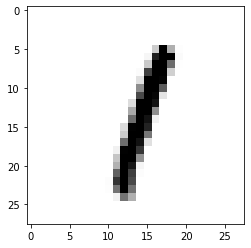

In [30]:
n = 5
print('神經網路預測是：', y_predict[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys');

# 12.6更酷炫的互動呈現

In [31]:
from ipywidgets import interact_manual

In [32]:
def test(測試編號):
  plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys') #要將拉平的維度弄回 (28, 28)
  print('神經網路判斷為:', y_predict[測試編號])

In [33]:
interact_manual(test, 測試編號=(0, 9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

到底測試資料總的狀況如何呢? 我們可以給我們神經網路「總評量」。

In [34]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0091 - accuracy: 0.9423


In [35]:
print('loss', score[0])
print('正確率', score[1])

loss 0.00914856605231762
正確率 0.942300021648407


# 12.7儲存我們完整模型

如果對訓練成果滿意, 我們當然不想每次都再訓練一次! 我們可以把神經網路的架構和訓練好的參數都存起來, 以供日後使用!

在 Colab 上, 我們要先連到自己的 Google Drive。

In [36]:
#儲存 model
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


再來是 cd 到你的資料夾中, 我們通常是放到自己 Colab Notebooks 中, 自然你可以指定其他的資料夾。

In [37]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [38]:
model.save('my_dnn_model')